In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['database.sqlite', 'Tweets.csv']


In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Reading the dataset

In [3]:
data=pd.read_csv("../input/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Taking two columns **airline_sentiment** and **text** also mapping the **airline_sentiment** column

In [4]:
data["airline_sentiment"]=data.airline_sentiment.map({"neutral":"0","positive":"1","negative":"-1"})
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,-1,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,-1,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
X=data.iloc[:,10]
print(X.size)
Y=data.iloc[:,1]


14640


Showing the total count of each sentiments for every airline

Text(0.5, 1.0, 'Sentiment')

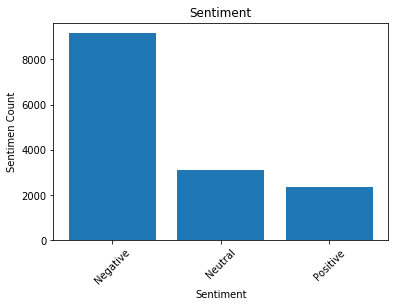

In [6]:
sentiment=data['airline_sentiment'].value_counts()

label=['Negative','Neutral','Positive']
index = np.arange(len(label))

plt.bar(index,sentiment)
plt.xticks(index,label,rotation=45)
plt.ylabel('Sentimen Count')
plt.xlabel('Sentiment')
plt.title('Sentiment')

Display sentiment for each airline seperately 

In [7]:
def plot_for_each_airline(airline_name):
        airline_data=data[data['airline']==airline_name]
        sentiment=airline_data['airline_sentiment'].value_counts()
        label=['Negative','Neutral','Positive']
        index = np.arange(len(label))
        
        plt.bar(index,sentiment)
        plt.xticks(index,label,rotation=45)
        plt.ylabel('Sentimen Count')
        plt.xlabel('Sentiment')
        plt.title(airline_name)

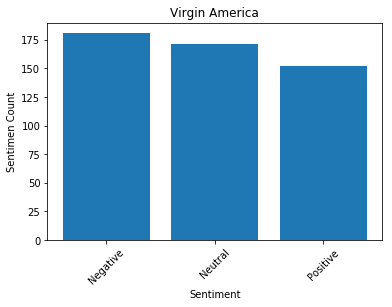

In [8]:
plot_for_each_airline("Virgin America")

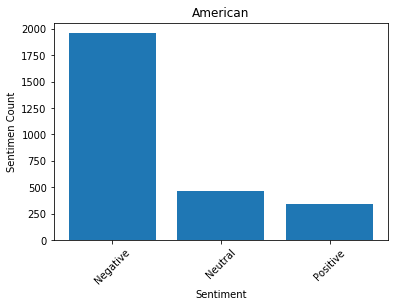

In [9]:
plot_for_each_airline("American")

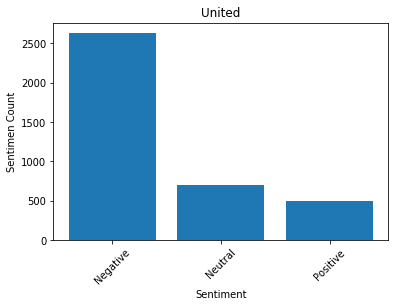

In [10]:
plot_for_each_airline("United")


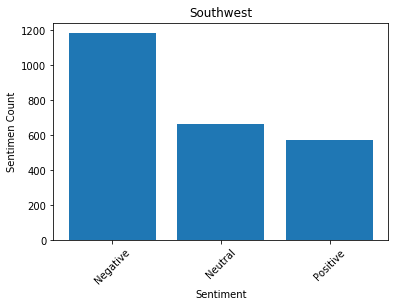

In [11]:
plot_for_each_airline("Southwest")


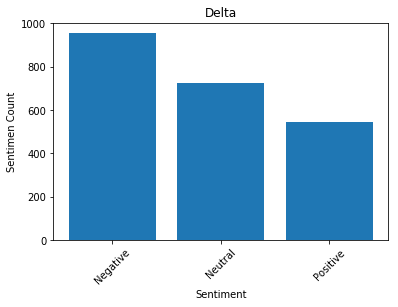

In [12]:
plot_for_each_airline("Delta")

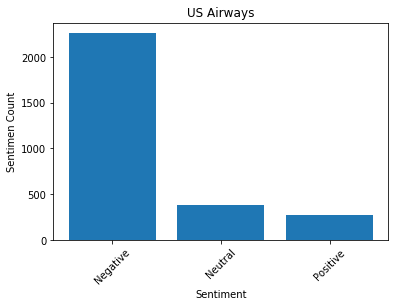

In [13]:
plot_for_each_airline("US Airways")

Splitting training data set and test data set after using countvetorizer to construct bag of words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()
bag_of_words=vectorizer.fit_transform(X)
vc=vectorizer.get_feature_names
# uncomment to see bag of words , its lengthy so not showing
#print(bag_of_words.toarray())
#print( vectorizer.vocabulary_)

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(bag_of_words,Y,test_size=0.2)


Using random forest classifier for classifying sentiment into -1,0 and 1  

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train.toarray(),Y_train)

predict=model.predict(X_test.toarray())
print(model.score(X_test.toarray(),Y_test))
print(model.score(bag_of_words,Y))


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7257513661202186
0.9332650273224044


The accuracy looks good. Now we will create a function to take user input as string and print its sentiment

In [17]:
def user_defined_sentences(statement):
    st=[s]
    vect=vectorizer.transform(st)
    print(vect.toarray())
    predict=model.predict(vect.toarray())
    print(predict)
    polarity=model.predict_proba(vect.toarray())
    print(polarity)

    # uncomment to see linear graph
    # plt.plot(index,polarity.reshape(-1,1))
    # plt.show()
    
    # plotting horizontal bar graph for better demonstration 
    plt.bar(index,polarity[0])
    plt.ylabel('Probability',fontsize=10)
    plt.xlabel('Prediction',fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=40)
    plt.title('Sentiment of Sentence')
    plt.show()


s=user input , I am taking a negative statement here 

[[0 0 0 ... 0 0 0]]
['-1']
[[1. 0. 0.]]


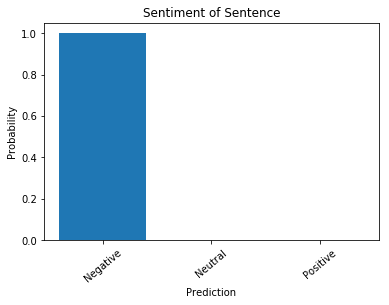

In [18]:
s="Not happy with the flight, too boring and late"
user_defined_sentences(s)


So we are sure that its a negative statement